In [1]:
import openml as oml
import pandas as pd
moneyball = oml.datasets.get_dataset(41021) # Download MoneyBall data
# Get the predictors X and the target y
X, y, attribute_names = moneyball.get_data(target=moneyball.default_target_attribute, return_attribute_names=True)
# Describe the data with pandas, just to get an overview
ballframe = pd.DataFrame(X, columns=attribute_names)
ballframe.describe()

,Team,League,Year,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,15.669642,0.500000,1988.957764,715.081970,80.904221,0.326331,0.397342,0.259273,0.198052,2.122951,1.717213,3.918831,0.332264,0.419743
std,9.720403,0.500203,14.819625,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,0.000000,0.000000,1962.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,0.000000,0.000000,0.000000,0.294000,0.346000
25%,7.000000,0.000000,1976.750000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,1.000000,1.000000,4.000000,0.321000,0.401000
50%,16.000000,0.500000,1989.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,2.000000,2.000000,4.000000,0.331000,0.419000
75%,23.000000,1.000000,2002.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,3.000000,3.000000,4.000000,0.343000,0.438000
max,38.000000,1.000000,2012.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,7.000000,4.000000,7.000000,0.384000,0.499000


In [38]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



1 . Visually explore the data. Plot the distribution of each feature (e.g. histograms), as well as the target. Visualize the dependency of the target on each feature (use a 2d scatter plot). Is there anything that stands out? Is there something that you think might require special treatment?
- Feel free to create additional plots that help you understand the data
 - Only visualize the data, you don't need to change it (yet)

In order to visualize the data of those features with missing values we used the sklearn Imputer to fill the NaN's with the mean value. 

From the histograms we observe that:
Features such as W, OBP, SLG and BA have a distribution similar to a gaussian distribution, which is also the case for the target.
When observing their 2D scatter plot, these features showed a linear relationship with the target, which suggest that a linear regression would describe correctly
the relationship between the selected features and the target.
The histogram of RA and the target are very similar. 
Some categories such as League and Playoffs have binary features, and don't seem to predict accurately the target feature. 

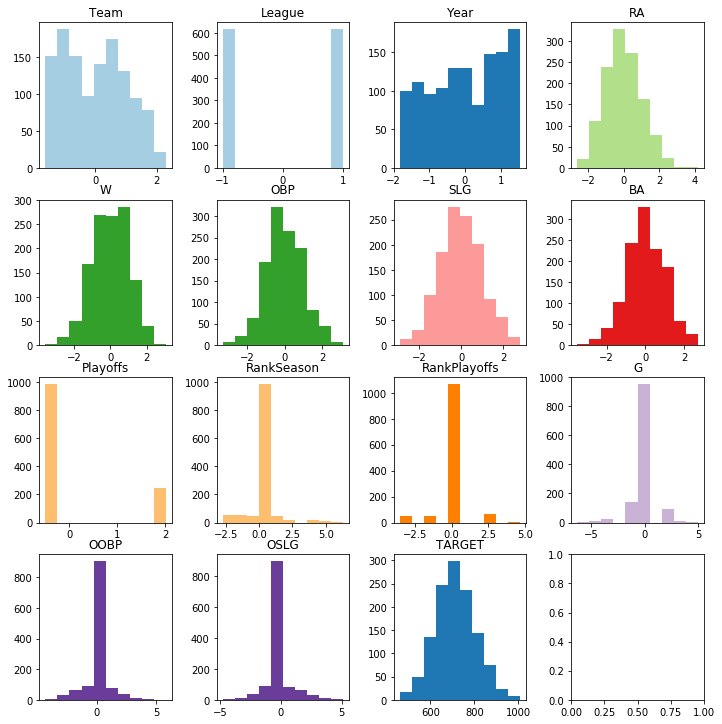

In [7]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
plt.tight_layout()
a=np.array(X)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
a=imp.fit_transform(a)

scaler = StandardScaler()
a = scaler.fit_transform(a)
#for n_neighbors, ax in zip([1, 3, 9], axes):
#for x in range(0, 14) :
for x , ax  in enumerate(axes.flatten()):
    if x==14:
       break
    else:
        _ =ax.hist(a[:, x], color=plt.cm.Paired(x/16.))
        _ =ax.set_title(attribute_names[x])


#plt.show()
#SHOW PLOT FOR TARGET
_ =axes[3,2].set_title('TARGET')
_ =axes[3,2].hist(y)

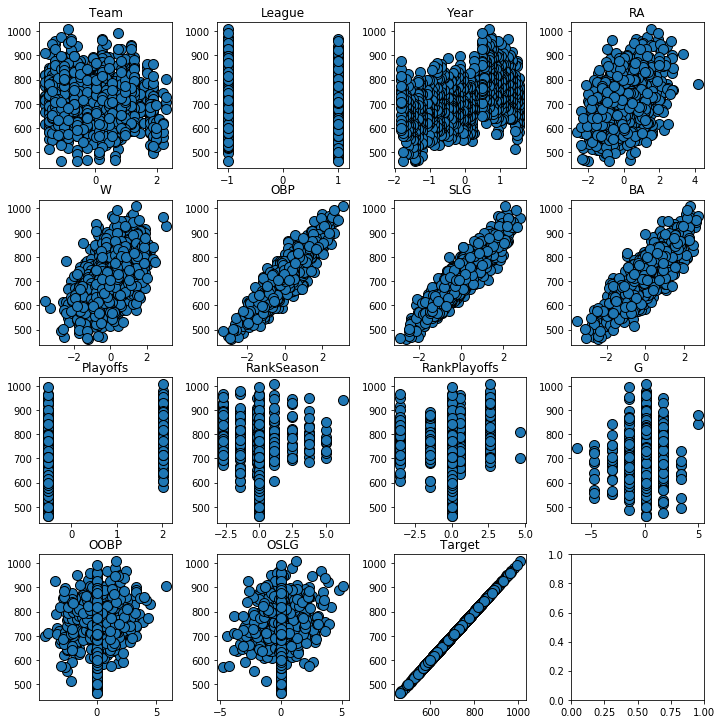

In [9]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import mglearn

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
plt.tight_layout()
a=np.array(X)

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
a=imp.fit_transform(a)
#a = scale(a, axis=0)
scaler = StandardScaler()
a = scaler.fit_transform(a)

#for n_neighbors, ax in zip([1, 3, 9], axes):
#for x in range(0, 14) :
for x , ax  in enumerate(axes.flatten()):
    if x==14:
       break
    else:
        _ =mglearn.discrete_scatter(a[:,x], y, ax=ax)
        _ =ax.set_title(attribute_names[x])


_ =mglearn.discrete_scatter(y, y, ax=axes[3,2])
_ =ax.set_title('Target')

2 . Compare all linear regression algorithms that we covered in class (Linear Regression, Ridge, Lasso and ElasticNet), as well as kNN. Evaluate using cross-validation and the R2R2 score, with the default parameters. Does scaling the data with StandardScaler help? Provide a concise but meaningful interpretation of the results.

    Preprocess the data as needed (e.g. are there nominal features that are not ordinal?). If you don't know how to proceed, remove the feature and continue.


We preprocessed the data using the Inputer to substitute the NaN's for the 
mean values, we also scaled the data using StandardScaler. We tested using
One Hot encoding on the nominal features, but performance was not better than
when we simply omitted them. Thus, we omitted them. 

We proceed to test all linear regression algorithms, first without scaling
and then with scaling:

In [14]:
# Testing Regression methods with Default values
#Without Scaling
print("Regression methods with Default values WITHOUT Scaling")

import openml as oml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import mglearn
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


## Feature selection
nX=X[:,3:8]
#nX=X
## Get rid of NaN
a=np.array(nX)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
a=imp.fit_transform(a)

X_train, X_test, y_train, y_test = train_test_split(a, y, random_state=0)


##KNN
#Run all linear models without scaling the data.
# Instantiate the model, set the number of neighbors to consider to 3:
regKN = KNeighborsRegressor() #Default is 5 
# Fit the model using the training data and training targets:
regKN.fit(X_train, y_train)
#print("Test set predictions:\n{}".format(reg.predict(X_test)))

print("KNN (5 Neighbours) Training set R^2: {:.2f}".format(regKN.score(X_train, y_train)))
print("KNN (5 Neighbours) Test set R^2: {:.2f}".format(regKN.score(X_test, y_test)))
scores = cross_val_score(regKN, a, y, cv=10)
print("KNN (5 Neighbours) Average cross-validation score: {:.2f}".format(scores.mean()))


#LINEAR REGRESSION.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print(" ")
print("LINEAR REGRESSION Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("LINEAR REGRESSION Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))
scores = cross_val_score(lr, a, y, cv=10)
print("LINEAR REGRESSION Average cross-validation score: {:.2f}".format(scores.mean()))


#Ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(" ")
print("RIDGE Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("RIDGE Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
scores = cross_val_score(ridge, a, y, cv=10)
print("RIDGE Average cross-validation score: {:.2f}".format(scores.mean()))


##LASSO
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(" ")
print("LASSO Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("LASSO Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

scores = cross_val_score(lasso, a, y, cv=10)
print("LASSO Average cross-validation score: {:.2f}".format(scores.mean()))


##ElasticNet
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

print(" ")
print("ELASTIC NET Training set score: {:.2f}".format(regr.score(X_train, y_train)))
print("ELASTIC NET Test set score: {:.2f}".format(regr.score(X_test, y_test)))

scores = cross_val_score(regr, a, y, cv=10)
print("ELASTIC NET Average cross-validation score: {:.2f}".format(scores.mean()))

Regression methods with Default values WITHOUT Scaling
KNN (5 Neighbours) Training set R^2: 0.86
KNN (5 Neighbours) Test set R^2: 0.81
KNN (5 Neighbours) Average cross-validation score: 0.70
 
LINEAR REGRESSION Training set score (R^2): 0.94
LINEAR REGRESSION Test set score (R^2): 0.95
LINEAR REGRESSION Average cross-validation score: 0.92
 
RIDGE Training set score: 0.88
RIDGE Test set score: 0.90
RIDGE Average cross-validation score: 0.84
 
LASSO Training set score: 0.85
LASSO Test set score: 0.87
LASSO Average cross-validation score: 0.80
 
ELASTIC NET Training set score: 0.85
ELASTIC NET Test set score: 0.87
ELASTIC NET Average cross-validation score: 0.80


In [15]:
# Testing Regression methods with Default values
#With  Scaling
print("Regression methods with Default values WITHOUT Scaling")

import openml as oml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import mglearn
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


## Feature selection
nX=X[:,3:8]
#nX=X
## Get rid of NaN
a=np.array(nX)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
a=imp.fit_transform(a)

scaler = StandardScaler()
a = scaler.fit_transform(a)

X_train, X_test, y_train, y_test = train_test_split(a, y, random_state=0)


##KNN
#Run all linear models without scaling the data.
# Instantiate the model, set the number of neighbors to consider to 3:
regKN = KNeighborsRegressor() #Default is 5 
# Fit the model using the training data and training targets:
regKN.fit(X_train, y_train)
#print("Test set predictions:\n{}".format(reg.predict(X_test)))

print("KNN (5 Neighbours) Training set R^2: {:.2f}".format(regKN.score(X_train, y_train)))
print("KNN (5 Neighbours) Test set R^2: {:.2f}".format(regKN.score(X_test, y_test)))
scores = cross_val_score(regKN, a, y, cv=10)
print("KNN (5 Neighbours) Average cross-validation score: {:.2f}".format(scores.mean()))


#LINEAR REGRESSION.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print(" ")
print("LINEAR REGRESSION Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("LINEAR REGRESSION Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))
scores = cross_val_score(lr, a, y, cv=10)
print("LINEAR REGRESSION Average cross-validation score: {:.2f}".format(scores.mean()))


#Ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(" ")
print("RIDGE Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("RIDGE Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
scores = cross_val_score(ridge, a, y, cv=10)
print("RIDGE Average cross-validation score: {:.2f}".format(scores.mean()))


##LASSO
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(" ")
print("LASSO Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("LASSO Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

scores = cross_val_score(lasso, a, y, cv=10)
print("LASSO Average cross-validation score: {:.2f}".format(scores.mean()))


##ElasticNet
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

print(" ")
print("ELASTIC NET Training set score: {:.2f}".format(regr.score(X_train, y_train)))
print("ELASTIC NET Test set score: {:.2f}".format(regr.score(X_test, y_test)))

scores = cross_val_score(regr, a, y, cv=10)
print("ELASTIC NET Average cross-validation score: {:.2f}".format(scores.mean()))

Regression methods with Default values WITHOUT Scaling
KNN (5 Neighbours) Training set R^2: 0.95
KNN (5 Neighbours) Test set R^2: 0.93
KNN (5 Neighbours) Average cross-validation score: 0.90
 
LINEAR REGRESSION Training set score (R^2): 0.94
LINEAR REGRESSION Test set score (R^2): 0.95
LINEAR REGRESSION Average cross-validation score: 0.92
 
RIDGE Training set score: 0.94
RIDGE Test set score: 0.95
RIDGE Average cross-validation score: 0.92
 
LASSO Training set score: 0.94
LASSO Test set score: 0.95
LASSO Average cross-validation score: 0.92
 
ELASTIC NET Training set score: 0.91
ELASTIC NET Test set score: 0.91
ELASTIC NET Average cross-validation score: 0.87


The results show that Scaling the data as a preprocessing step improves performance
of all methods with the exception of the Linear Regression method, which does not require it. 
However, since the rest of the methods depend on a regularization,  scaling 
becomes of great importance. 

3 . Do a default, shuffled train-test split and optimize the linear models for the degree of regularization ($alpha$) and choice of penalty (L1/L2). For Ridge and  Lasso, plot a curve showing the effect of the training and test set performance ($R^2$) while increasing the degree of regularization for different penalties. For ElasticNet, plot a heatmap $alpha \times l1\_ratio \rightarrow R^2$ using test set performance.
Report the optimal performance. Again, provide a concise but meaningful interpretation. What does the regularization do? Can you get better results?
- Think about how you get the L1/L2 loss. This is not a hyperparameter in regression.
- We've seen how to generate such heatmaps in Lecture 3.

In [13]:
#Optimizing parameters for linear models

from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(a,y, random_state=0)

#KNN
from sklearn.neighbors import KNeighborsRegressor
neighbors=[1,3,6,9,12,15,18]
param_grid = {
              'n_neighbors': neighbors}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid)

_=grid_search.fit(X_train, y_train)
print(" ")
print((grid_search.best_estimator_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


#Ridge
from sklearn.linear_model import Ridge
#alpha=np.linspace(0.1,50,10)
#alpha=[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10];
alpha=[ 0.001, 0.01, 0.1, 1, 10];


param_grid = {
              'alpha': alpha}

grid_search = GridSearchCV(Ridge(), param_grid)

_=grid_search.fit(X_train, y_train)
print(" ")
print((grid_search.best_estimator_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


#Lasso
from sklearn.linear_model import Lasso
#alpha=np.linspace(0.1,50,10)
#alpha=[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10];
alpha=[ 0.001, 0.01, 0.1, 1, 10];


param_grid = {
              'alpha': alpha}

grid_search = GridSearchCV(Lasso(), param_grid)

_=grid_search.fit(X_train, y_train)
print(" ")
print((grid_search.best_estimator_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



 
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='uniform')
Test set score: 0.93
Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.92
 
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Test set score: 0.95
Best parameters: {'alpha': 1}
Best cross-validation score: 0.94
 
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Test set score: 0.95
Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.94


Test set score: 0.95
Best parameters: {'alpha': 2}
Best cross-validation score: 0.94
Best estimator:
Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


/home/raleman/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


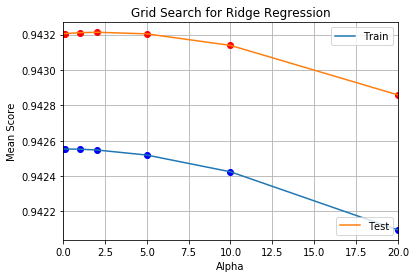

In [30]:
#Hyperparameter optimization in Ridge

#alpha=np.linspace(0.1,100,10)
#alpha=np.linspace(0.0001,50,10)
alpha=[ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5,10,20 ]

param_grid = {
              'alpha': alpha}
#print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit()
from sklearn.linear_model import Ridge

grid_search = GridSearchCV(Ridge(), param_grid,cv=shuffle_split)
X_train, X_test, y_train, y_test = train_test_split(a,y, random_state=0)

_=grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

_=plt.plot(alpha,grid_search.cv_results_['mean_train_score'], 'bo')
line1,=plt.plot(alpha,grid_search.cv_results_['mean_train_score'], label="Train")

_=plt.plot(alpha,grid_search.cv_results_['mean_test_score'], 'ro')
line2,=plt.plot(alpha,grid_search.cv_results_['mean_test_score'], label="Test")
first_legend = plt.legend(handles=[line1], loc=1)

ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc=4)

#plt.plot(alpha,scores, 'ro')
#plt.plot(alpha,scores)

_=plt.xlabel('Alpha')
_=plt.ylabel('Mean Score')
_=plt.title('Grid Search for Ridge Regression')
_=plt.grid()
#plt.xlim(0,100)
#plt.xscale('symlog')
#_=plt.xlim(0,alpha.max())
_=plt.xlim(0,max(alpha))

Test set score: 0.95
Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.94
Best estimator:
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


/home/raleman/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


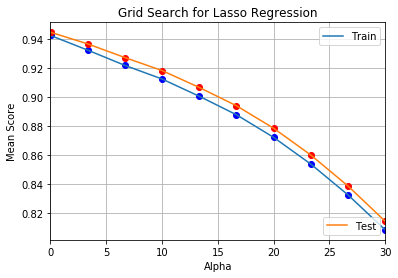

In [17]:
#Hyperparameter optimization in Lasso
alpha=np.linspace(0.01,30,10)

param_grid = {
              'alpha': alpha}
#print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit()
from sklearn.linear_model import Lasso

grid_search = GridSearchCV(Lasso(), param_grid,cv=shuffle_split)
X_train, X_test, y_train, y_test = train_test_split(a,y, random_state=0)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))


_=plt.plot(alpha,grid_search.cv_results_['mean_train_score'], 'bo')
line1,=plt.plot(alpha,grid_search.cv_results_['mean_train_score'], label="Train")

_=plt.plot(alpha,grid_search.cv_results_['mean_test_score'], 'ro')
line2,=plt.plot(alpha,grid_search.cv_results_['mean_test_score'], label="Test")
first_legend = plt.legend(handles=[line1], loc=1)

ax = plt.gca().add_artist(first_legend)
_=plt.legend(handles=[line2], loc=4)

#plt.plot(alpha,scores, 'ro')
#plt.plot(alpha,scores)

_=plt.xlabel('Alpha')
_=plt.ylabel('Mean Score')
_=plt.title('Grid Search for Lasso Regression')
_=plt.grid()
_=plt.xlim(0,alpha.max())
#plt.xscale('symlog')


/home/raleman/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/raleman/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/raleman/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/raleman/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

Test set score: 0.95
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.15}
Best cross-validation score: 0.94
Best estimator:
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.15,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)


/home/raleman/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/raleman/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/raleman/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/raleman/miniconda3/li

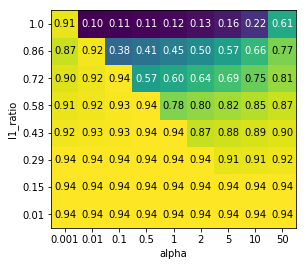

In [25]:
#ELASTIC NET 
##ElasticNet
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

#alpha=np.linspace(0.01,30,10)
#alpha=[0.0001,0.001,0.01,0.1, 1 ,10]
alpha=[0.001, 0.01,0.1, 0.5, 1, 2 , 5 ,10, 50]


l1_ratio=np.linspace(0.01,1,8)
l1_ratio=np.around(l1_ratio,2)
param_grid = {
              'alpha': alpha,
                'l1_ratio': l1_ratio
                             }

#print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit()


grid_search = GridSearchCV(regr, param_grid,cv=shuffle_split)

X_train, X_test, y_train, y_test = train_test_split(a,y, random_state=0)
grid_search.fit(X_train, y_train)


print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)

import numpy as np
import mglearn
scores = np.array(results.mean_test_score).reshape(8, 9)
mglearn.tools.heatmap(scores, xlabel='alpha', xticklabels=param_grid['alpha'],
                      ylabel='l1_ratio', yticklabels=param_grid['l1_ratio'], cmap="viridis");


In [12]:
# Best results after hyperparameters being tuned. 

import openml as oml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import mglearn
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


## Feature selection
nX=X[:,3:8]
nX=X

## Get rid of NaN
a=np.array(nX)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
a=imp.fit_transform(a)

scaler = StandardScaler()
a = scaler.fit_transform(a)


X_train, X_test, y_train, y_test = train_test_split(a, y, random_state=0)


##KNN
#Run all linear models without scaling the data.
# Instantiate the model, set the number of neighbors to consider to 3:
regKN = KNeighborsRegressor(n_neighbors=9) #Default is 5 
# Fit the model using the training data and training targets:
regKN.fit(X_train, y_train)
#print("Test set predictions:\n{}".format(reg.predict(X_test)))

print("KNN (9 Neighbours) Training set R^2: {:.2f}".format(regKN.score(X_train, y_train)))
print("KNN (9 Neighbours) Test set R^2: {:.2f}".format(regKN.score(X_test, y_test)))
scores = cross_val_score(regKN, a, y, cv=10)
print("KNN (9 Neighbours) Average cross-validation score: {:.2f}".format(scores.mean()))

#LINEAR REGRESSION.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print(" ")
print("LINEAR REGRESSION Training set score (R^2): {:.2f}".format(lr.score(X_train, y_train)))
print("LINEAR REGRESSION Test set score (R^2): {:.2f}".format(lr.score(X_test, y_test)))
scores = cross_val_score(lr, a, y, cv=10)
print("LINEAR REGRESSION Average cross-validation score: {:.2f}".format(scores.mean()))


#Ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print(" ")
print("RIDGE Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("RIDGE Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
scores = cross_val_score(ridge, a, y, cv=10)
print("RIDGE Average cross-validation score: {:.2f}".format(scores.mean()))


##LASSO
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print(" ")
print("LASSO Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("LASSO Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

scores = cross_val_score(lasso, a, y, cv=10)
print("LASSO Average cross-validation score: {:.2f}".format(scores.mean()))


##ElasticNet
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0,alpha=0.01, l1_ratio=0.5)
regr.fit(X_train, y_train)

print(" ")
print("ELASTIC NET Training set score: {:.2f}".format(regr.score(X_train, y_train)))
print("ELASTIC NET Test set score: {:.2f}".format(regr.score(X_test, y_test)))

scores = cross_val_score(regr, a, y, cv=10)
print("ELASTIC NET Average cross-validation score: {:.2f}".format(scores.mean()))


KNN (9 Neighbours) Training set R^2: 0.89
KNN (9 Neighbours) Test set R^2: 0.86
KNN (9 Neighbours) Average cross-validation score: 0.78
 
LINEAR REGRESSION Training set score (R^2): 0.95
LINEAR REGRESSION Test set score (R^2): 0.95
LINEAR REGRESSION Average cross-validation score: 0.92
 
RIDGE Training set score: 0.95
RIDGE Test set score: 0.95
RIDGE Average cross-validation score: 0.92
 
LASSO Training set score: 0.95
LASSO Test set score: 0.95
LASSO Average cross-validation score: 0.92
 
ELASTIC NET Training set score: 0.95
ELASTIC NET Test set score: 0.95
ELASTIC NET Average cross-validation score: 0.92


After hyperparameter optimization we obtained the same score for all methods,
with the exception of KNN which gave a slightly lesser score. 
Regularization with such a small value of alpha made all methods obtain 
the same score initially obtained by the Linear Regression. Despite this low value
of alpha, the scores gave no sign of overfitting. 
Due to its nature, KNN was not able to be tuned up to behave as the Linear 
Regression and thus, gave a lower score. It does not seem feasible to obtain a better score by using the models here tested

4 . Visualize the coefficients of the optimized models. Do they agree on which features are
important? Compare the results with the feature importances returned by a RandomForest. Does it agree with the linear models? What would look for when scouting for a baseball player?

(-10, 50)

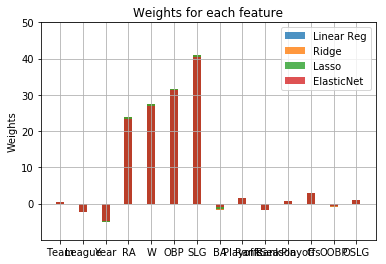

In [16]:

import numpy as np
import matplotlib.pyplot as plt


N = X.shape[1]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
alph=0.8

p1 = plt.bar(ind, lr.coef_, width,alpha=alph)
p2 = plt.bar(ind, ridge.coef_, width,alpha=alph)
p3 = plt.bar(ind, lasso.coef_, width,alpha=alph)
p4 = plt.bar(ind, regr.coef_, width,alpha=alph)


#p2 = plt.bar(ind, womenMeans, width,
 #            bottom=menMeans, yerr=womenStd)

plt.ylabel('Weights')
plt.title('Weights for each feature')
plt.xticks(ind, attribute_names)
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Linear Reg', 'Ridge','Lasso','ElasticNet'))
plt.grid()

plt.ylim([-10,50])

Accuracy on training set: 0.985
Accuracy on test set: 0.919


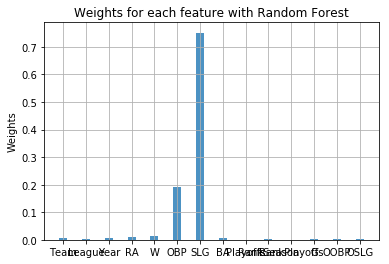

In [18]:

from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt


N = X.shape[1]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
alph=0.8


forest = RandomForestRegressor(n_estimators=10, random_state=0) # Vary n_estimators
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))



p1 = plt.bar(ind,forest.feature_importances_, width,alpha=alph)
plt.ylabel('Weights')
plt.title('Weights for each feature with Random Forest')
plt.grid()
_=plt.xticks(ind, attribute_names)


The weights from the optimized models show that RA, W, OBP and SLG are the main features to be used, whereas Random Trees reduces them to only OBP and SLG being the main features used in the prediction. So we could say that both approaches partially agree. Given this evidence, we would mainly focus on OBP and SLG to select a player. 